<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2019 talks

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

### 2. List Comprehension

### 3. Filter with named function

### 4. Filter with anonymous function

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [0]:
!pip install textstat

## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

Titles sorted reverse alphabetically

### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

Percentage of talks with long titles

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

Histogram of title lengths, in characters

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** the question: Which descriptions could fit in a tweet?


# Stretch Challenge

**Make** another new column in the dataframe:
- description grade level (you can use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Answer** the question: What's the distribution of grade levels? Plot a histogram.

**Be aware** that [Textstat has issues when sentences aren't separated by spaces](https://github.com/shivam5992/textstat/issues/77#issuecomment-453734048). (A Lambda School Data Science student helped identify this issue, and emailed with the developer.) 

Also, [BeautifulSoup doesn't separate paragraph tags with spaces](https://bugs.launchpad.net/beautifulsoup/+bug/1768330).

So, you may get some inaccurate or surprising grade level estimates here. Don't worry, that's ok — but optionally, can you do anything to try improving the grade level estimates?

In [0]:
url = 'https://us.pycon.org/2019/schedule/talks/list/'

In [0]:
import bs4
import requests

result = requests.get(url)

soup = bs4.BeautifulSoup(result.text)
soup.select('.presentation-description')[0].text
descriptions = []
for tag in soup.select('.presentation-description'):
  description = tag.text
  descriptions.append(description)


In [8]:
type(descriptions), len(descriptions)

(list, 95)

In [10]:
descriptions[0],descriptions[-1]

("Have you ever wanted to write a GUI application in Python that you can run on both your laptop and your phone? Have you been looking to contribute to an open source project, but you don't know where to start?\r\n\r\nBeeWare is a set of software libraries for cross-platform native app development from a single Python codebase and tools to simplify app deployment. The project aims to build, deploy, and run apps for Windows, Linux, macOS, Android, iPhone, and the web. It is native because it is actually using your platform's native GUI widgets, not a theme, icon pack, or webpage wrapper.\r\n\r\nThis talk will teach you how Toga, the BeeWare GUI toolkit, is architected and then show you how you can contribute to Toga by creating your own GUI widget in five easy steps.",
 "Time zones are complicated, but they are a fact of engineering life. Time zones have [skipped entire days](http://www.bbc.com/news/world-asia-16351377) and repeated others. There are time zones that switch to [DST twice

In [18]:
 import pandas as pd
 pd.options.display.max_colwidth = 50
 df = pd.DataFrame({'description':descriptions})
 df.shape

(95, 1)

In [19]:
df.head()

,description
0,Have you ever wanted to write a GUI applicatio...
1,We rarely think about the dot “.” between our ...
2,Account security means making sure your users ...
3,Do you feel overwhelmed by the prospect of hav...
4,Everyone’s talking about it. Everyone’s using ...


In [0]:
#word count
!pip install textstat
import textstat
df['description word count'] = df['description'].apply(textstat.lexicon_count)

In [21]:
#character count
df['description character count'] = df['description'].apply(len)
df.head()

,description,description word count,description character count
0,Have you ever wanted to write a GUI applicatio...,135,766
1,We rarely think about the dot “.” between our ...,56,298
2,Account security means making sure your users ...,66,428
3,Do you feel overwhelmed by the prospect of hav...,84,508
4,Everyone’s talking about it. Everyone’s using ...,96,647


In [29]:
#My lord, is that <tweet> legal?
df['tweet legal'] = df['description character count'].apply(lambda x: x < 280)
df['tweet legal'].value_counts()

False    94
True      1
Name: tweet legal, dtype: int64

In [31]:
#Describe all the dataframe's columns. What's the average description word count? The minimum? The maximum?
mean = df['description word count'].mean()
minimum = df['description word count'].min()
maximum = df['description word count'].max()
print({'mean':mean,'minimum':minimum,'maximum':maximum})

{'mean': 130.82105263157894, 'minimum': 20, 'maximum': 421}


In [36]:
def statts(column):
  mean = column.mean()
  minimum = column.min()
  maximum = column.max()
  return{'mean':mean,'minimum':minimum,'maximum':maximum}
    
statts(df['description word count'])    

{'maximum': 421, 'mean': 130.82105263157894, 'minimum': 20}

In [37]:
statts(df['description character count'])

{'maximum': 2827, 'mean': 813.7894736842105, 'minimum': 122}

In [38]:
df['text grade'] = df['description'].apply(textstat.flesch_kincaid_grade)
df.head()

,description,description word count,description character count,tweet legal,text grade
0,Have you ever wanted to write a GUI applicatio...,135,766,False,14.1
1,We rarely think about the dot “.” between our ...,56,298,False,10.7
2,Account security means making sure your users ...,66,428,False,8.5
3,Do you feel overwhelmed by the prospect of hav...,84,508,False,17.3
4,Everyone’s talking about it. Everyone’s using ...,96,647,False,10.8


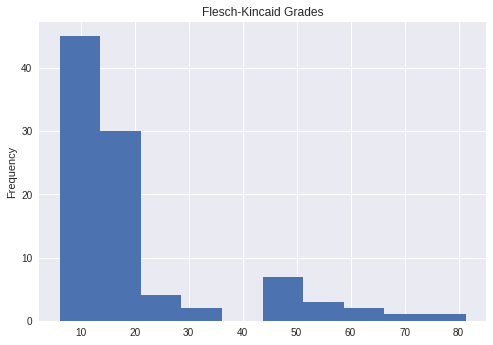

In [39]:
title = 'Flesch-Kincaid Grades'
df['text grade'].plot.hist(title=title);